In [ ]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt

In [13]:
dataset = pd.read_csv("mnist_train.csv")

In [14]:
dataset.head()


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


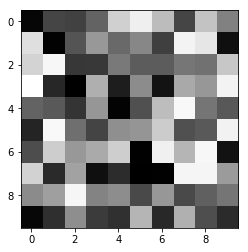

In [15]:
# Plotting images
a = np.random.random((10,10))
plt.figure()
plt.imshow(a, cmap='gray')
plt.show()

In [16]:
data = dataset.values[:5000]
data.shape

(5000, 785)

In [17]:
X, y = data[:,1:], data[:, 0]

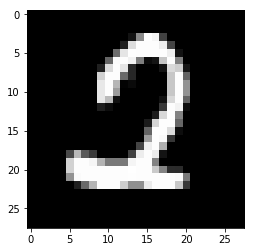

In [18]:
# Plotting digit
im = X[4997].reshape((28,28))
plt.figure()
plt.imshow(im, cmap='gray')
plt.show()

In [19]:
split = int(X.shape[0] * 0.80)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(y_train)
print(y_test)

(4000, 784) (4000,)
(1000, 784) (1000,)
[5 0 4 ... 3 9 6]
[7 3 0 1 5 2 8 5 0 0 1 3 1 1 1 5 2 5 6 9 7 8 3 0 7 9 9 0 2 1 6 2 9 3 7 4 8
 5 4 6 8 7 7 8 0 9 7 0 5 1 9 2 8 3 6 4 9 5 8 6 9 7 5 8 1 9 1 0 3 1 1 2 6 3
 7 4 5 5 6 6 2 7 0 8 8 9 2 6 4 1 6 9 9 9 3 9 2 4 9 4 8 3 4 8 5 1 0 4 0 1 6
 2 6 5 4 0 7 9 9 5 1 3 9 0 9 4 5 9 1 1 7 7 4 4 5 4 3 1 3 8 1 7 0 6 2 0 4 8
 8 1 6 8 1 2 3 6 3 2 9 0 1 9 1 1 7 2 1 5 5 4 6 5 4 7 4 7 8 5 4 3 4 0 2 2 5
 2 1 2 6 7 1 3 5 1 5 4 3 4 6 3 7 0 1 0 2 4 9 7 2 9 6 7 2 8 6 8 0 7 0 9 0 6
 9 3 4 1 7 7 4 9 2 6 6 3 3 3 3 1 3 0 4 2 7 6 9 0 3 5 1 6 3 6 4 8 7 7 3 3 8
 5 9 8 3 3 4 0 7 1 6 2 0 3 8 7 4 8 3 9 2 0 7 3 8 4 0 7 1 8 0 0 5 1 4 2 1 3
 7 4 7 5 1 6 5 7 5 8 9 9 8 5 0 1 5 9 6 9 0 7 4 1 9 0 2 9 8 0 7 5 3 9 7 7 7
 1 7 3 4 6 7 3 0 2 3 0 0 9 4 0 8 6 9 1 3 7 7 2 0 8 7 3 6 4 9 7 6 6 7 6 9 3
 8 2 7 3 0 8 5 9 9 4 2 8 4 8 8 7 4 1 8 0 1 8 6 7 7 7 7 5 2 9 3 2 6 3 6 1 4
 1 6 4 4 5 1 5 2 0 5 4 3 8 1 7 7 4 5 9 6 2 2 3 6 6 7 4 8 1 4 2 4 4 8 1 2 5
 0 1 2 9 8 3 5 2 7 0 4 0 9 2 7 9 4 3 5 6 4

In [20]:
def knn(X_train, y_train, test_point, k=5):
    
    distances = [] # Contains list of tuples (distance, label
    
    for data_point, label in zip(X_train, y_train):
        distances.append((euclidean(test_point, data_point), label))
    #     for i in range(X_train.shape[0]):
    #         data_point = X_train[i]
    #         label = y_train[i]
    
    sorted_distances = sorted(distances, key=lambda x: x[0])
    k_nearest_neighbors = np.array(sorted_distances[:k])
    freq = np.unique(k_nearest_neighbors[:,1], return_counts=True)
    labels, counts = freq
    majority_vote = labels[counts.argmax()]
    return majority_vote

In [21]:
def euclidean(p1, p2):
    return np.sqrt(np.sum((p1-p2)**2))

euclidean(np.array([1,2,3]), np.array([4,5,6]))

5.196152422706632

In [22]:
def calculate_accuracy(X_test, y_test, X_train, y_train, k=5):
    
    predictions = []
    
    for test_point in X_test:
        pred_label = knn(X_train, y_train, test_point, k)
        predictions.append(pred_label)
    
    predictions = np.array(predictions)
    
    accuracy = (predictions == y_test).sum() / y_test.shape[0]
    return accuracy

In [23]:
calculate_accuracy(X_test, y_test, X_train, y_train, k=5)

0.923

In [26]:
test_df = pd.read_csv("mnist_test.csv",index_col = 'label')


In [27]:
test_df.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
label,,,,,,,,,,,,,,,,,,,,,
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_data = test_df.values
test_images = test_data[:10]
test_images.shape

In [ ]:
for test in test_images:
    im = test.reshape((28,28))
    plt.figure()
    plt.imshow(im, cmap='gray')
    plt.show()
    print("Label:", knn(X_train, y_train, test))
    input()